# Imports

In [2]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from utils import *
from meSAX import meSAX

# Load data

In [3]:
df = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
df = df['Close'][:2500].values.squeeze()
df

[*********************100%***********************]  1 of 1 completed


array([ 6.44741058,  6.45855999,  6.35582829, ..., 63.43808746,
       64.3687973 , 65.6121521 ])

In [4]:
df.shape

(2500,)

# Sax method

In [5]:
sax = meSAX(K=20, windows_size=100, step_size=20)
sax.synthesize(df)

array([[      0,   18219,   41599],
       [      0,   23876,   43309],
       [   9125,   29667,   43309],
       [  22679,   33084,   43309],
       [  23133,   33959,   48146],
       [  25283,   38209,   66506],
       [  25283,   43497,   66833],
       [  25283,   49800,   68444],
       [  25283,   57402,   80456],
       [  45723,   66528,   87712],
       [  57265,   72881,   90336],
       [  57265,   76211,   90336],
       [  67752,   79204,   90336],
       [  71110,   80393,   90336],
       [  90336,   79071,   65091],
       [  65091,   81827,  111605],
       [  65091,   85220,  111605],
       [  65091,   90518,  116906],
       [  65091,   96410,  121548],
       [  85098,  102410,  121548],
       [  85098,  103388,  121548],
       [  90568,  108152,  134442],
       [  90568,  117475,  171262],
       [  90568,  134759,  218557],
       [  95653,  158355,  234541],
       [ 111198,  177628,  234541],
       [ 133370,  193568,  234541],
       [ 174440,  205335,  2

In [6]:
import sys
print(sys.getsizeof(sax.symbol))
sys.getsizeof(df.tolist())

3032


20056

In [7]:
from tqdm import tqdm

reconstructed_data = np.zeros(df.shape)

for i, triplet in tqdm(enumerate(sax.symbol)):
    mean = sax.breakpoints[triplet[1]]
    elem_0, elem_1 = sax.breakpoints[triplet[0]], sax.breakpoints[triplet[2]]
    min_, max_ = min(elem_0, elem_1), max(elem_0, elem_1)
    samples = np.random.normal(mean, 0.5, sax.step_size)
    while np.any(samples < min_) or np.any(samples > max_):
        wrong_args_min = np.where(samples < min_)[0]
        wrong_args_max = np.where(samples > max_)[0]
        wrong_args = np.concatenate((wrong_args_min, wrong_args_max))
        samples[wrong_args] = np.random.normal(mean, 1, len(wrong_args))
    
    np.sort(samples)
    if elem_0 > elem_1:
        samples = samples[::-1]

    reconstructed_data[i*sax.step_size:(i+1)*sax.step_size] = samples

reconstructed_data = reconstructed_data[reconstructed_data != 0]
reconstructed_data

121it [00:00, 45882.90it/s]


array([ 6.61328205,  6.91446183,  6.32845151, ..., 55.0748904 ,
       55.90251277, 55.29554271])

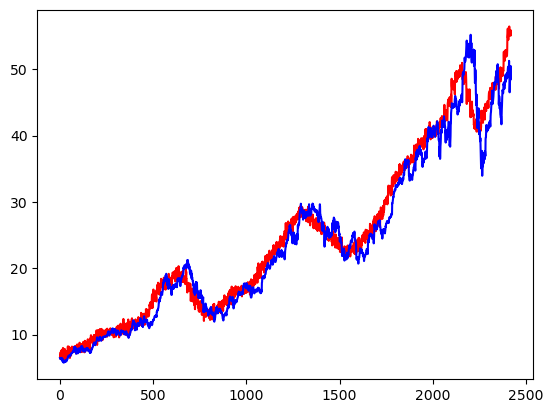

In [8]:
plt.plot(reconstructed_data, color='red')
plt.plot(df[:len(reconstructed_data)], color='blue')